<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20based%20onWSNBFSF_rev.3(02062023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RF and LSTM (Stanalone) model based on WSNBFSF dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [4]:
dataset["Class"].unique()

array([0, 1, 2, 3])

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


**Data Preprocessing**

In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


In [10]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest (RF) for 4 class classifications**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[47558  3656  1286     0]
 [    8 50924     0  1622]
 [  253    15 51295   982]
 [    0   233   218 52231]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     52500
           1       0.93      0.97      0.95     52554
           2       0.97      0.98      0.97     52545
           3       0.95      0.99      0.97     52682

    accuracy                           0.96    210281
   macro avg       0.96      0.96      0.96    210281
weighted avg       0.96      0.96      0.96    210281



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='copper')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Random Forest


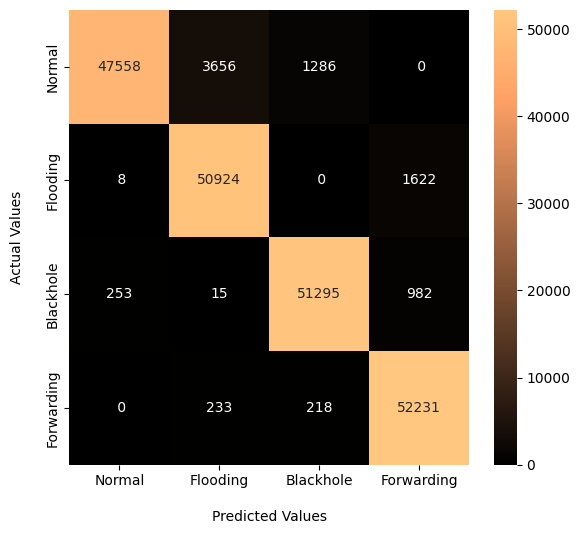

In [14]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [16]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 96.0657406042391
Precision : 96.18265393285739
Recall : 96.0657406042391
F1-Score : 0.9605200421313906


AUC: 1.00


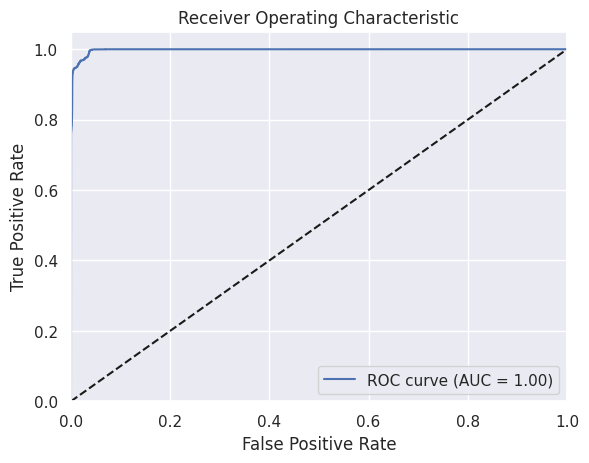

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the predicted probabilities
y_test_probabilities = rf.predict_proba(X_test)

# Compute the AUC
auc = roc_auc_score(y_test, y_test_probabilities, multi_class='ovr')
print("AUC: {:.2f}".format(auc))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probabilities[:, 1], pos_label=1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

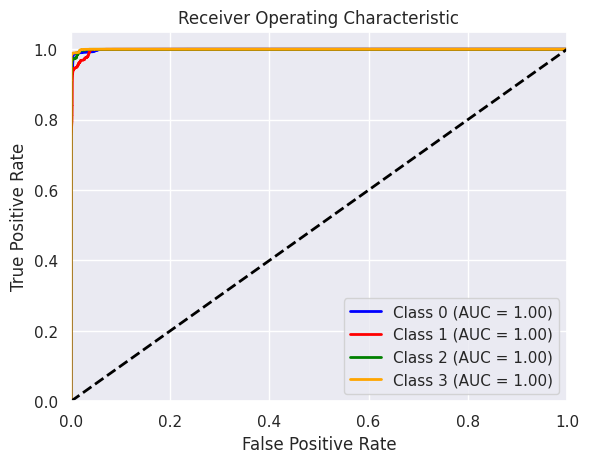

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the AUC and ROC curve
n_classes = 4  # Set the number of classes to 4
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

y_scores = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc_values = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_scores[:, i], pos_label=i)
    roc_auc_values[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
class_labels = label_encoder.classes_[:n_classes]  # Get the class labels for plotting

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc_values[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Detection rates of RF model**

In [33]:
# Calculate the detection rates
detection_rates = np.diag(cm) / np.sum(cm, axis=1)

# Print the detection rates
print("Detection Rates:")
for i, rate in enumerate(detection_rates):
    print("Class {}: {:.2f}".format(i, rate))

Detection Rates:
Class 0: 0.96
Class 1: 1.00
Class 2: 1.00
Class 3: 0.99


**LSTM for 10 class classifications based on UNSW-NB15 dataset**

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Evaluate the model
score, acc = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Convert categorical target variables back to class labels
y_true = np.argmax(y_test, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_true, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
26286/26286 [==============================] - 330s 12ms/step - loss: 0.2860 - accuracy: 0.8839 - val_loss: 0.2021 - val_accuracy: 0.9201
Epoch 2/15
26286/26286 [==============================] - 326s 12ms/step - loss: 0.1573 - accuracy: 0.9409 - val_loss: 0.1130 - val_accuracy: 0.9576
Epoch 3/15
26286/26286 [==============================] - 321s 12ms/step - loss: 0.1182 - accuracy: 0.9571 - val_loss: 0.0856 - val_accuracy: 0.9707
Epoch 4/15
26286/26286 [==============================] - 322s 12ms/step - loss: 0.1025 - accuracy: 0.9634 - val_loss: 0.1411 - val_accuracy: 0.9448
Epoch 5/15
26286/26286 [==============================] - 337s 13ms/step - loss: 0.0921 - accuracy: 0.9680 - val_loss: 0.0763 - val_accuracy: 0.9695
Epoch 6/15
26286/26286 [==============================] - 322s 12ms/step - loss: 0.0880 - accuracy: 0.9695 - val_loss: 0.0895 - val_accuracy: 0.9724
Epoch 7/15
26286/26286 [==============================] - 323s 12ms/step - loss: 0.0813 - accuracy: 0.9728

Confusion Matrix of Long-Short-Term Memory (LSTM)


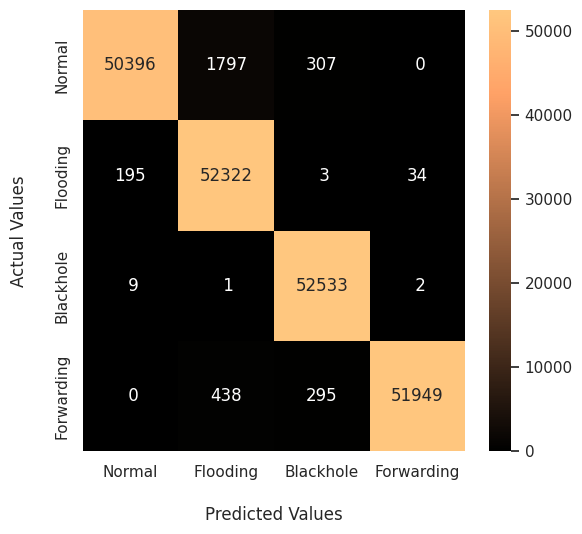

In [30]:
print("Confusion Matrix of Long-Short-Term Memory (LSTM)") 
conf_mat(y_true, predicted_classes)

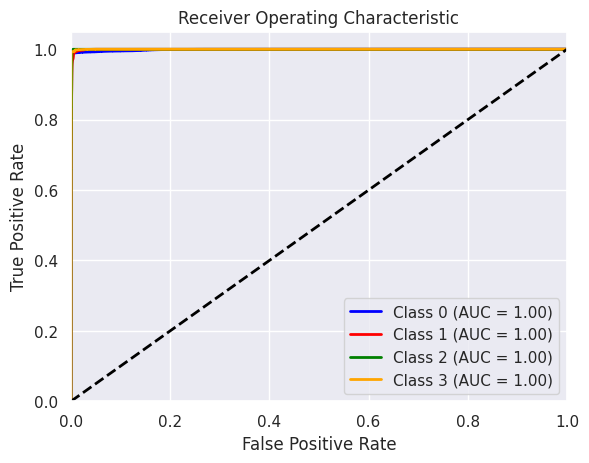

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the AUC and ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4  # Set the number of classes to 4

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Detection rates of LSTM model**

In [35]:
# Calculate the detection rates
detection_rates = np.diag(cm) / np.sum(cm, axis=1)

# Print the detection rates
print("Detection Rates:")
for i, rate in enumerate(detection_rates):
    print("Class {}: {:.2f}".format(i, rate))

Detection Rates:
Class 0: 0.96
Class 1: 1.00
Class 2: 1.00
Class 3: 0.99
